In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import normalize
import warnings
warnings.filterwarnings('ignore')

mnist_train_path = 'D:/UCSD Spring 2017/CSE 291/train.csv'
mnist_test_path = 'D:/UCSD Spring 2017/CSE 291/test.csv'

mnist_train_df = pd.read_csv(mnist_train_path, header=None).T
mnist_test_df = pd.read_csv(mnist_test_path, header=None).T
last_column = mnist_test_df.columns[-1]
mnist_train_df.rename(columns={last_column:'Class'}, inplace=True)
mnist_test_df.rename(columns={last_column:'Class'}, inplace=True)

In [2]:
mnist_train_df.tail()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,Class
24212,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
24213,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
24214,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
24215,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
24216,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0


In [3]:
mnist_train_df.shape

(24217, 785)

In [4]:
index_0s = mnist_train_df['Class'] == 0
index_1s = mnist_train_df['Class'] == 1
index_3s = mnist_train_df['Class'] == 3
index_5s = mnist_train_df['Class'] == 5

mnist_train_0_1_df = mnist_train_df.loc[index_0s | index_1s]
mnist_train_3_5_df = mnist_train_df.loc[index_3s | index_5s]

In [5]:
index_0s = mnist_test_df['Class'] == 0
index_1s = mnist_test_df['Class'] == 1
index_3s = mnist_test_df['Class'] == 3
index_5s = mnist_test_df['Class'] == 5

mnist_test_0_1_df = mnist_test_df.loc[index_0s | index_1s]
mnist_test_3_5_df = mnist_test_df.loc[index_3s | index_5s]

In [6]:
mnist_train_0_1_df.shape

(12665, 785)

In [7]:
mnist_train_0_1_df.tail()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,Class
12660,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
12661,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
12662,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
12663,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
12664,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [9]:
data_train_0_1=mnist_train_0_1_df.as_matrix()
data_train_3_5=mnist_train_3_5_df.as_matrix()
data_test_0_1=mnist_test_0_1_df.as_matrix()
data_test_3_5=mnist_test_3_5_df.as_matrix()

In [22]:
data_train_0_1[:,0:784].shape

(12665, 784)

In [30]:
X_train_0_1=data_train_0_1[:,0:784]
Y_train_0_1=data_train_0_1[:,784]
X_test_0_1=data_test_0_1[:,0:784]
Y_test_0_1=data_test_0_1[:,784]

In [31]:
X_train_3_5=data_train_3_5[:,0:784]
Y_train_3_5=data_train_3_5[:,784]
X_test_3_5=data_test_3_5[:,0:784]
Y_test_3_5=data_test_3_5[:,784]

In [32]:
max(Y_train_3_5)

5.0

In [40]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,10))
numbers = [0,1,12663,12664]
for i in range(4):
    example = X_train_0_1[numbers[i]].reshape(28, 28).T
    plt.subplot(2, 2, i+1)
    plt.imshow(example, cmap='gray_r', interpolation='nearest')
    plt.axis("off")
plt.tight_layout()

In [44]:
cov_0_1=np.cov((X_train_0_1).T)
cov_3_5=np.cov((X_train_3_5).T)

In [45]:
cov_0_1.shape

(784, 784)

In [46]:
from numpy import linalg as LA
eig_val_0_1, eig_vec_0_1 = LA.eig(cov_0_1)
eig_val_3_5, eig_vec_3_5 = LA.eig(cov_3_5)

In [64]:
eig_vec_0_1=np.real(eig_vec_0_1)
eig_vec_3_5=np.real(eig_vec_3_5)
eig_val_0_1=np.real(eig_val_0_1)
eig_val_3_5=np.real(eig_val_3_5)

In [65]:
eig_vec_0_1.shape

(784, 784)

In [66]:
sorted_eig_val_0_1=np.sort(eig_val_0_1)[::-1]
index_sorted_eig_val_0_1=np.argsort(eig_val_0_1)[::-1]
sorted_eig_val_3_5=np.sort(eig_val_3_5)[::-1]
index_sorted_eig_val_3_5=np.argsort(eig_val_3_5)[::-1]

In [69]:
plt.figure(figsize=(12,10))
for i in range(20):
    example = eig_vec_0_1[:,index_sorted_eig_val_0_1[i]].reshape(28, 28).T
    plt.subplot(4, 5, i+1)
    plt.imshow(example, cmap='gray')
    plt.title("Eigenvector: {0}".format(i+1))
    plt.axis("off")
plt.tight_layout()

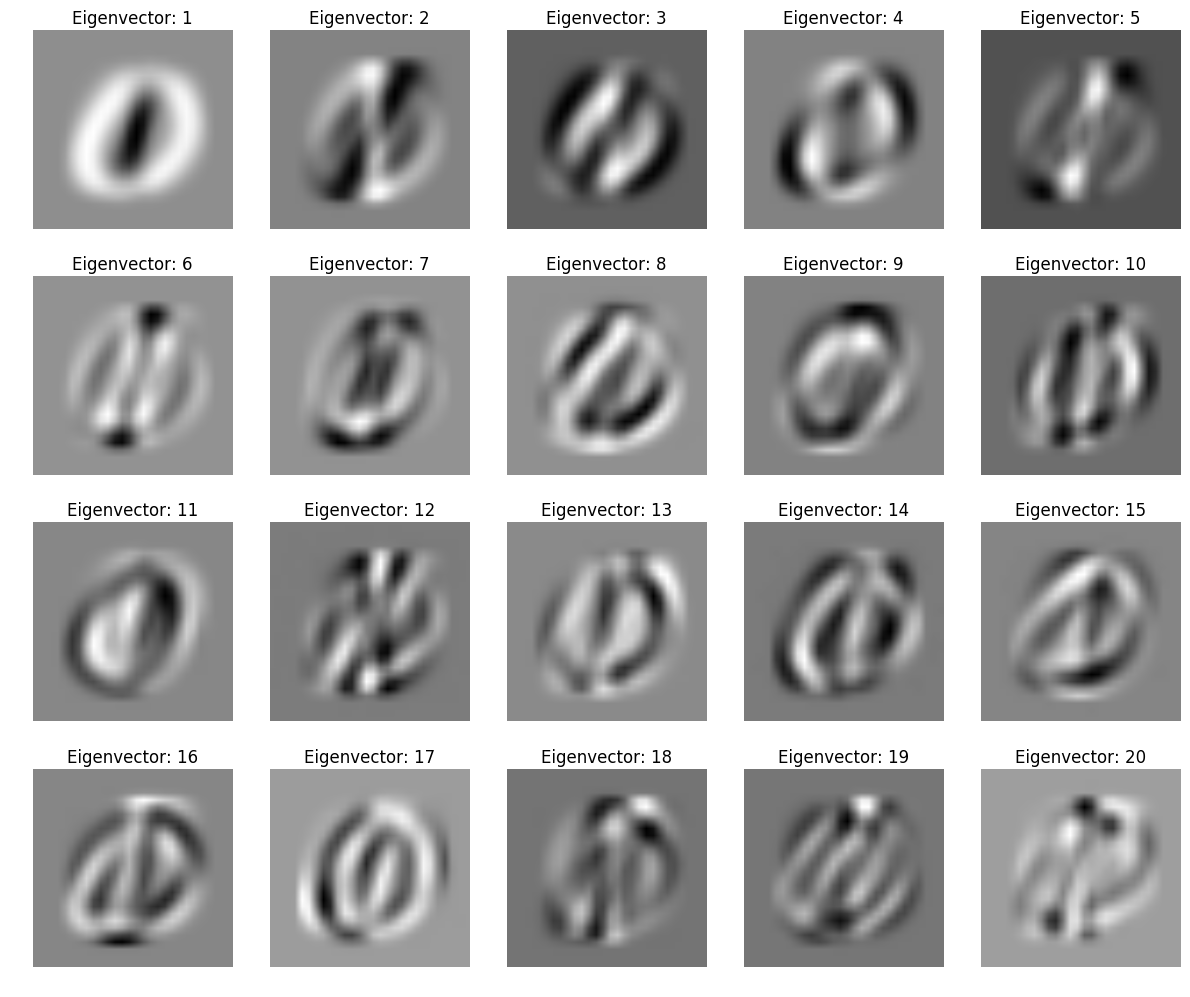

In [70]:
plt.show()

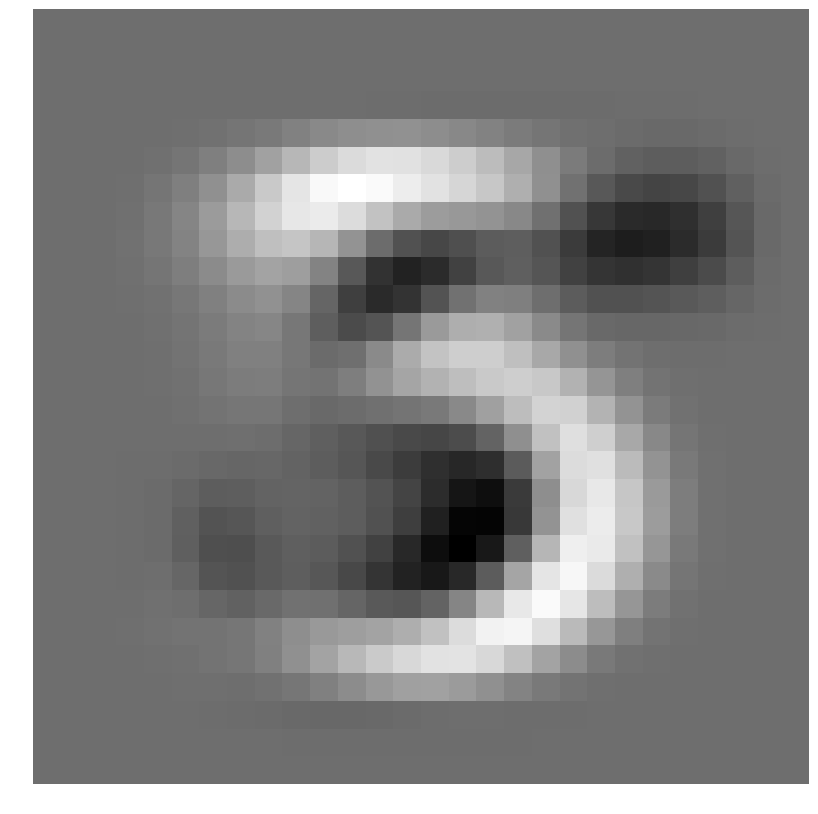

In [71]:
plt.figure(figsize=(10,10))
plt.imshow(eig_vec_3_5[:,index_sorted_eig_val_3_5[0]].reshape(28, 28).T, cmap='gray', interpolation='nearest')
plt.axis("off")
plt.show()

In [72]:
plt.figure(figsize=(12,10))
for i in range(20):
    example = eig_vec_3_5[:,index_sorted_eig_val_3_5[i]].reshape(28, 28).T
    plt.subplot(4, 5, i+1)
    plt.imshow(example, cmap='gray')
    plt.title("Eigenvector: {0}".format(i+1))
    plt.axis("off")
plt.tight_layout()

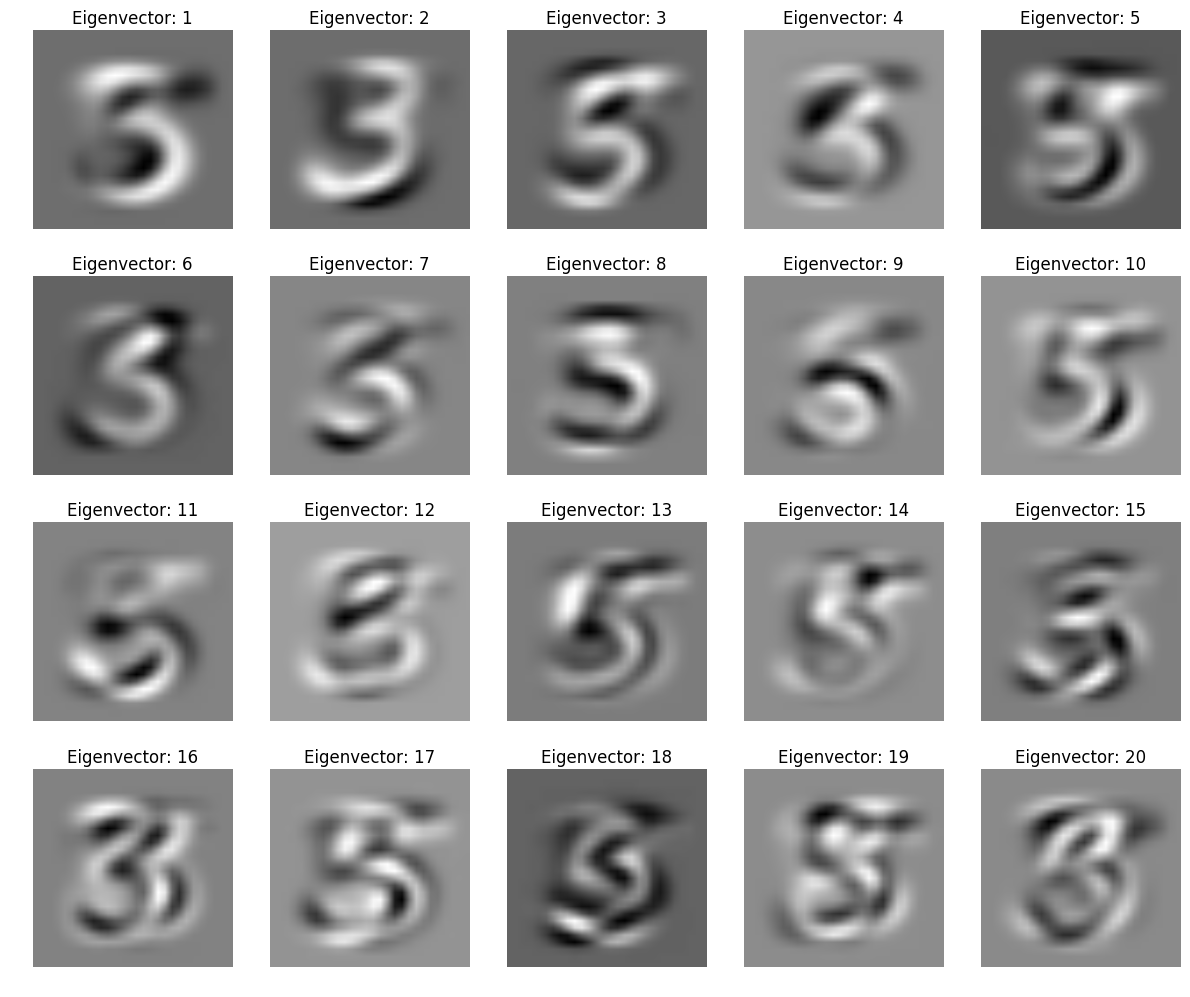

In [73]:
plt.show()

In [78]:
cumilative_sorted_eig_val_0_1=np.cumsum(sorted_eig_val_0_1)
norm_cumilative_sorted_eig_val_0_1=cumilative_sorted_eig_val_0_1/(max(cumilative_sorted_eig_val_0_1))

In [79]:
cumilative_sorted_eig_val_3_5=np.cumsum(sorted_eig_val_3_5)
norm_cumilative_sorted_eig_val_3_5=cumilative_sorted_eig_val_3_5/(max(cumilative_sorted_eig_val_3_5))

In [80]:
norm_cumilative_sorted_eig_val_0_1

array([ 0.32080447,  0.41140557,  0.49224049,  0.54775654,  0.58681503,
        0.62070727,  0.64416534,  0.66489196,  0.6827601 ,  0.69834488,
        0.7129231 ,  0.72610343,  0.73762686,  0.74879602,  0.75956825,
        0.76903753,  0.77744603,  0.78530194,  0.79276865,  0.79990708,
        0.80653071,  0.81255337,  0.81831085,  0.8240194 ,  0.82950032,
        0.83471177,  0.83958219,  0.84388408,  0.84814201,  0.85182877,
        0.85550096,  0.85891468,  0.86223048,  0.86547597,  0.86856912,
        0.87156707,  0.87446955,  0.87729715,  0.88004685,  0.88264545,
        0.88514193,  0.8875095 ,  0.88973149,  0.89188645,  0.89393861,
        0.89592719,  0.89789173,  0.89979756,  0.90164015,  0.90339344,
        0.90511933,  0.9067279 ,  0.90830576,  0.90982514,  0.91129955,
        0.91273963,  0.91414198,  0.91552113,  0.91688341,  0.91821523,
        0.91950714,  0.92075728,  0.92198097,  0.92317226,  0.92429769,
        0.92541281,  0.92647554,  0.92751592,  0.92854737,  0.92

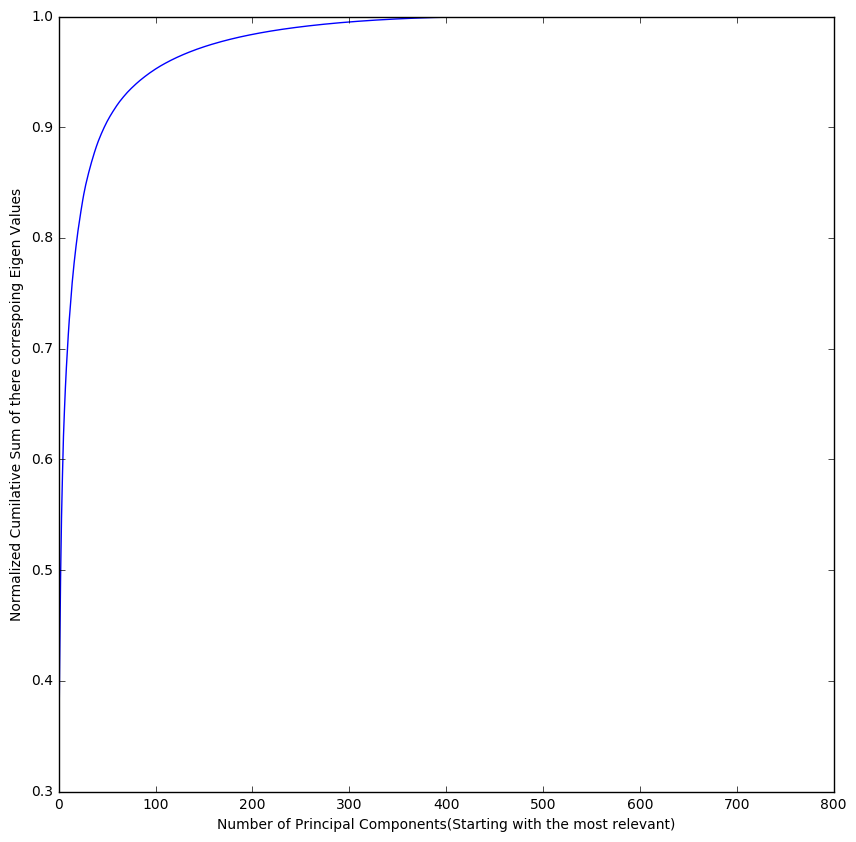

In [89]:
plt.figure(figsize=(10,10))
plt.plot(range(len(norm_cumilative_sorted_eig_val_0_1)), norm_cumilative_sorted_eig_val_0_1)
plt.xlabel('Number of Principal Components(Starting with the most relevant)')
plt.ylabel('Normalized Cumilative Sum of there correspoing Eigen Values')
plt.show()

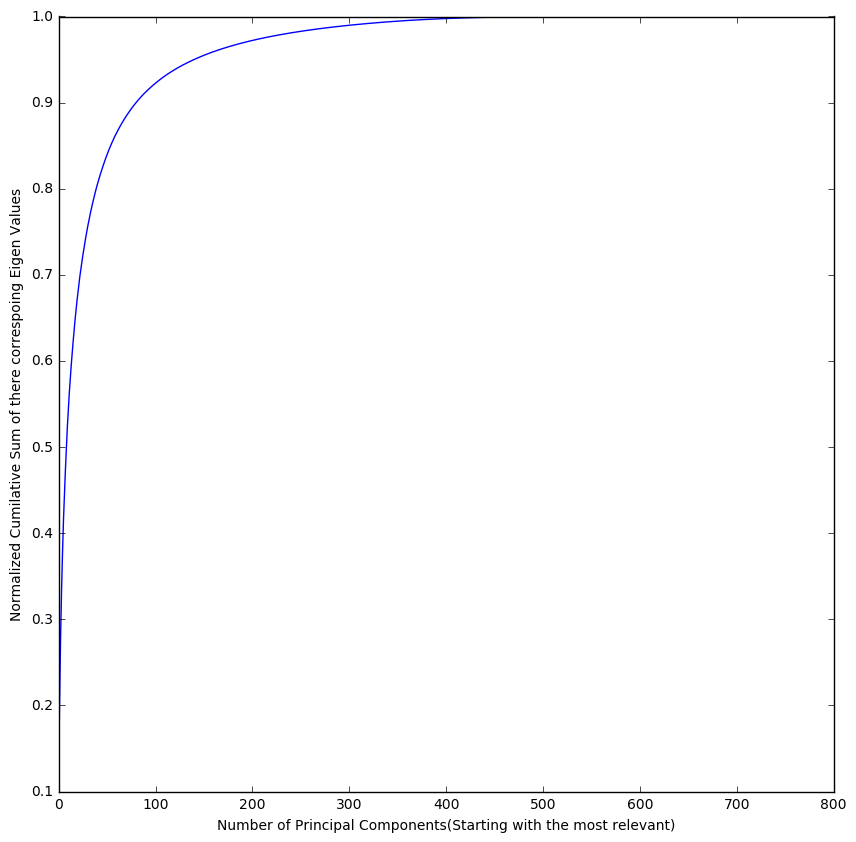

In [90]:
plt.figure(figsize=(10,10))
plt.plot(range(len(norm_cumilative_sorted_eig_val_3_5)), norm_cumilative_sorted_eig_val_3_5)
plt.xlabel('Number of Principal Components(Starting with the most relevant)')
plt.ylabel('Normalized Cumilative Sum of there correspoing Eigen Values')
plt.show()

In [118]:
pca_components_0_1=eig_vec_0_1[:,index_sorted_eig_val_0_1[0]]
for i in range(len(eig_val_0_1)-1):
    pca_components_0_1=np.column_stack((pca_components_0_1,eig_vec_0_1[:,index_sorted_eig_val_0_1[i+1]]))

In [121]:
pca_components_3_5=eig_vec_3_5[:,index_sorted_eig_val_3_5[0]]
for i in range(len(eig_val_3_5)-1):
    pca_components_3_5=np.column_stack((pca_components_3_5,eig_vec_3_5[:,index_sorted_eig_val_3_5[i+1]]))

In [122]:
pca_components_3_5.shape

(784, 784)

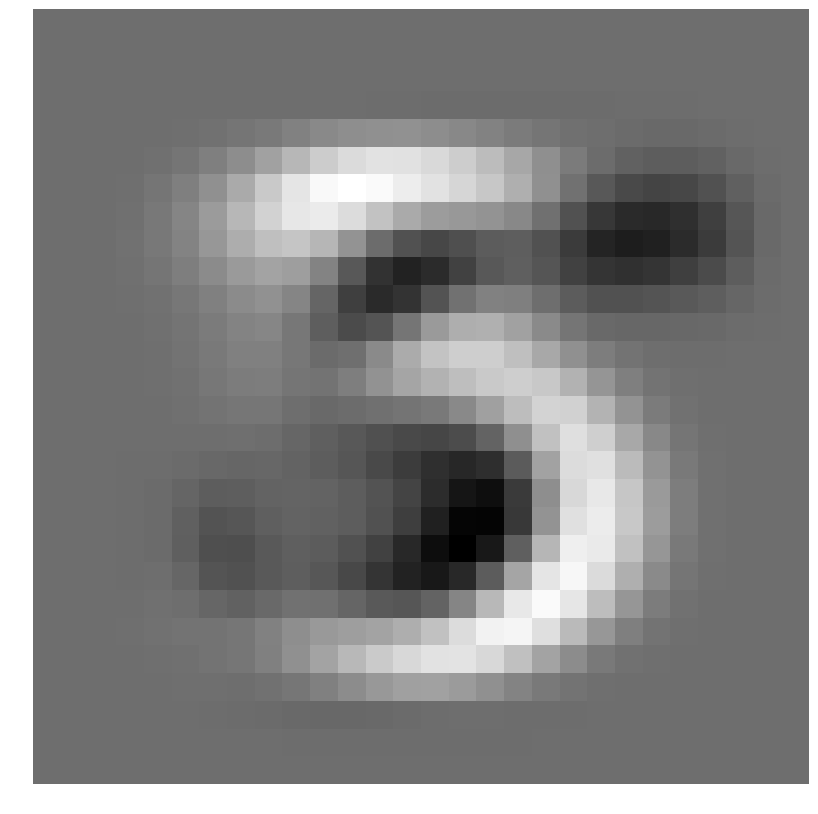

In [123]:
plt.figure(figsize=(10,10))
plt.imshow(pca_components_3_5[:,0].reshape(28, 28).T, cmap='gray', interpolation='nearest')
plt.axis("off")
plt.show()

In [145]:
reconstructions_0_1 = []
error_reconstructions_0_1=[]
n = 150
for i in range(1,n+1):
    projection = X_train_0_1[0,:].dot(pca_components_0_1[:,0:i])
    reconstruction = projection.dot(pca_components_0_1[:,0:i].T)
    error_reconstruction=sum((X_train_0_1[0,:]-reconstruction)**2)/len(reconstruction)
    error_reconstructions_0_1.append(error_reconstruction)
    reconstructions_0_1.append(reconstruction)

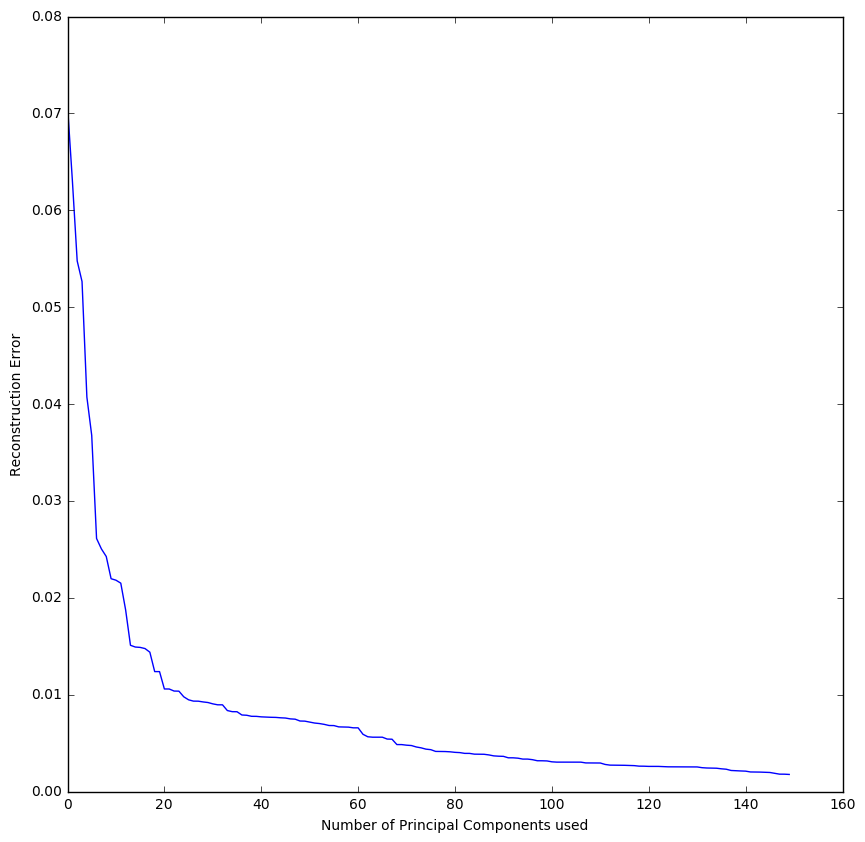

In [146]:
plt.figure(figsize=(10,10))
plt.plot(range(150), error_reconstructions_0_1)
plt.xlabel('Number of Principal Components used')
plt.ylabel('Reconstruction Error')
plt.show()

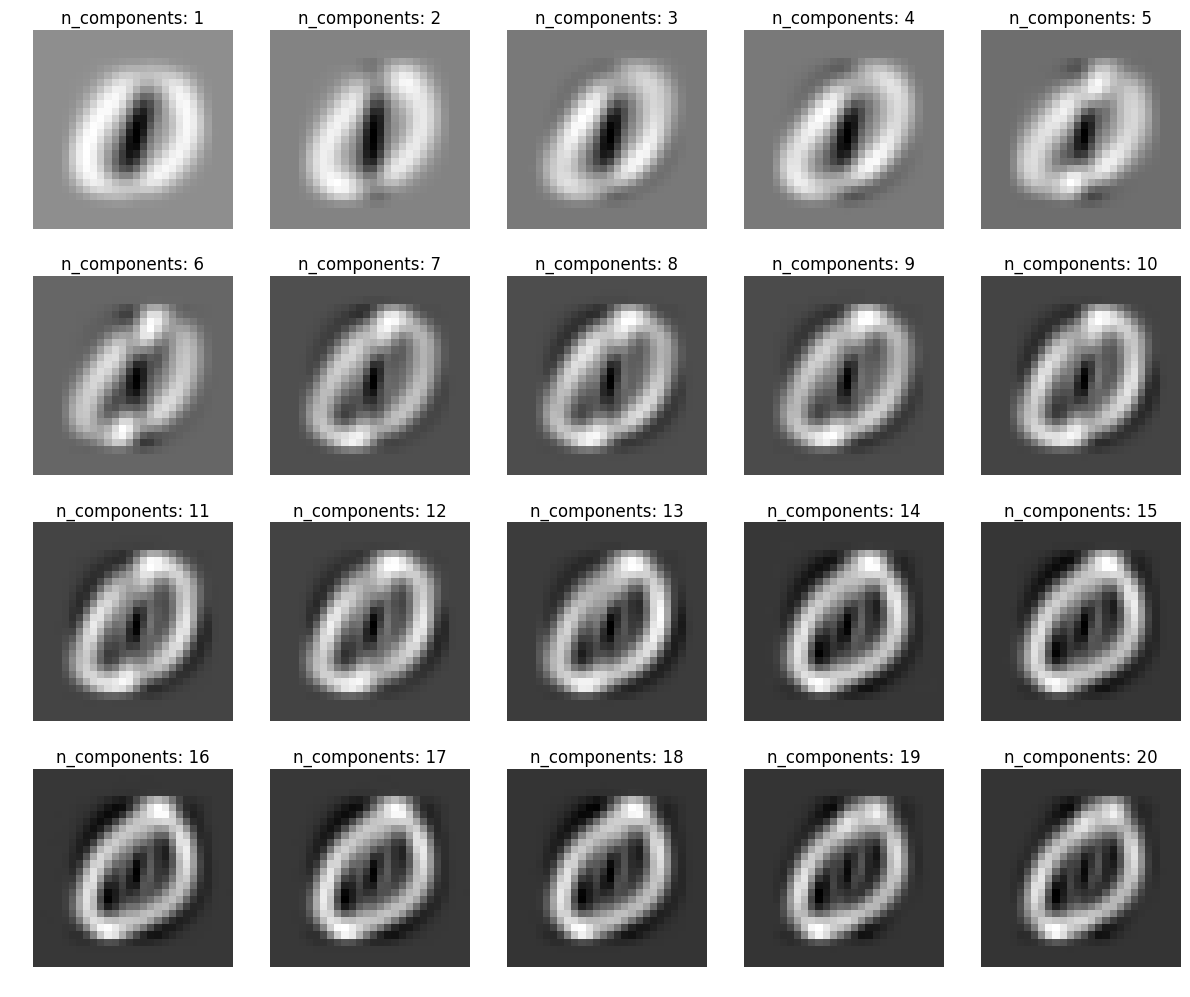

In [169]:
plt.figure(figsize=(12,10))
j=0
for i in range(20):
    example = reconstructions_0_1[i].reshape(28, 28).T
    plt.subplot(4, 5, j+1)
    plt.imshow(example, cmap='gray', interpolation='nearest')
    plt.title("n_components: {0}".format(i+1))
    plt.axis("off")
    j=j+1
plt.tight_layout()
plt.show()

In [159]:
reconstructions_3_5 = []
error_reconstructions_3_5=[]
n = 150
for i in range(1,n+1):
    projection = X_train_3_5[0,:].dot(pca_components_3_5[:,0:i])
    reconstruction = projection.dot(pca_components_3_5[:,0:i].T)
    error_reconstruction=sum((X_train_3_5[0,:]-reconstruction)**2)/len(reconstruction)
    error_reconstructions_3_5.append(error_reconstruction)
    reconstructions_3_5.append(reconstruction)

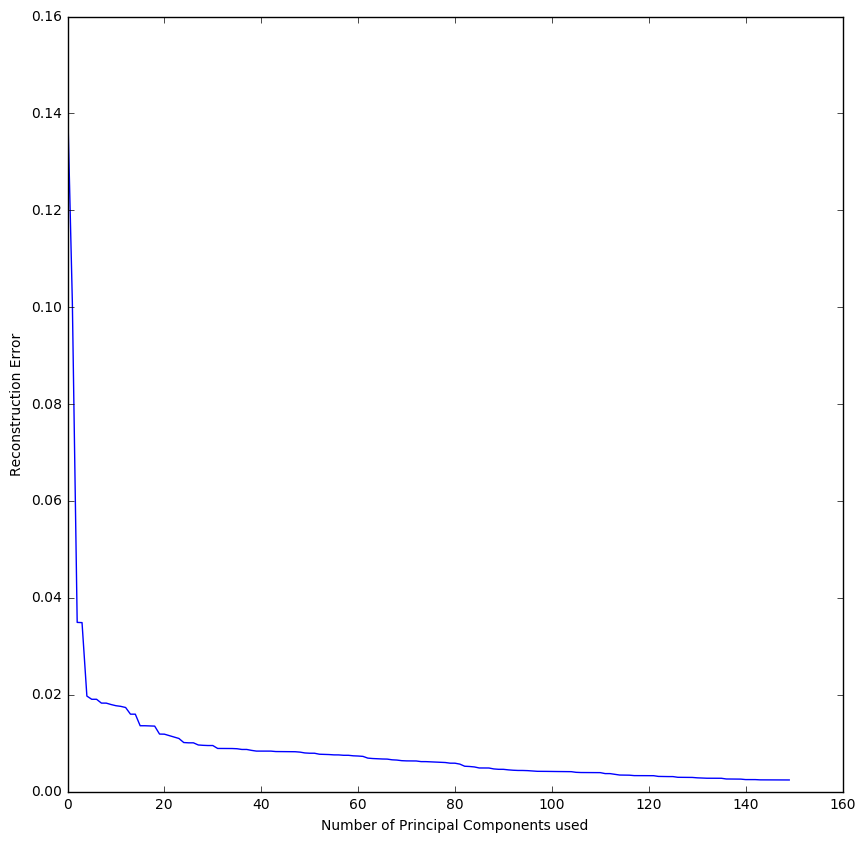

In [160]:
plt.figure(figsize=(10,10))
plt.plot(range(150), error_reconstructions_3_5)
plt.xlabel('Number of Principal Components used')
plt.ylabel('Reconstruction Error')
plt.show()

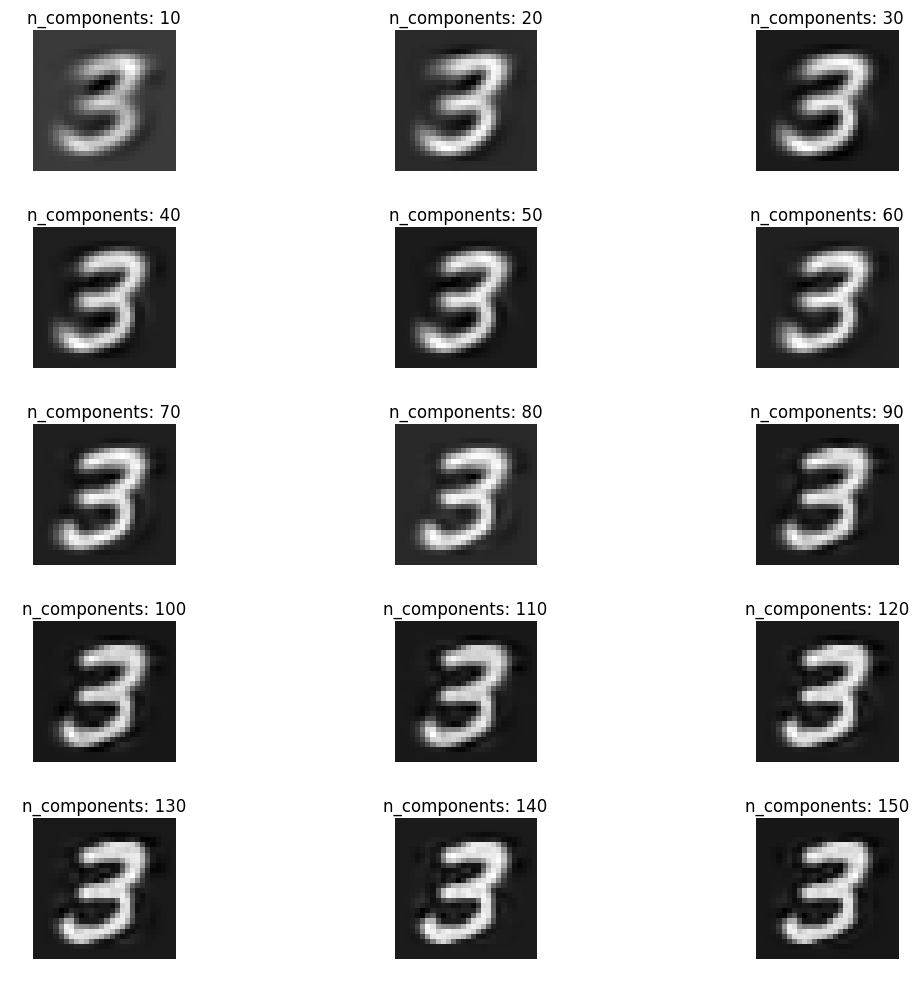

In [161]:
plt.figure(figsize=(12,10))
j=0
for i in range(10,151,10):
    example = reconstructions_3_5[i-1].reshape(28, 28).T
    plt.subplot(5, 3, j+1)
    plt.imshow(example, cmap='gray', interpolation='nearest')
    plt.title("n_components: {0}".format(i))
    plt.axis("off")
    j=j+1
plt.tight_layout()
plt.show()